# Verification experiment

by Catarina Fernandes


- input (2):  M x M diagonally symmetric matrix of distances, 1 x M vector of labels (ground truth)
- output (4): Equal error rate, AUC (ROC), Verification @ 0.1% false acceptance rate, ROC (vector plot)


In [3]:
import numpy as np 
from sklearn import metrics
from matplotlib import pyplot as plt

In [27]:
class VerificationExperiment():
    
    def __init__(self, distances_matrix, ground_truth):
        if distances_matrix.shape[0] != distances_matrix.shape[1]:
            raise ValueError(f"The Distances Matrix dimension should be M x M, instead it is {distances_matrix.shape[0]} x {distances_matrix.shape[1]}")
        
        if distances_matrix.shape[0] != len(ground_truth) or ground_truth.ndim != 1:
            raise ValueError(f"The Ground Truth Array should have 1 x {distances_matrix.shape[0]} dimension, instead it has {ground_truth.ndim} x {len(ground_truth)}.")

        if not ((0 <= distances_matrix) & (distances_matrix <= 1)).all():
            raise ValueError("The values in the Distances Matrix should be between 0 and 1.")

        if not np.allclose(distances_matrix, distances_matrix.T):
            raise ValueError("The Distances Matrix should be symetric.")
        
        self.distances_matrix = distances_matrix
        self.ground_truth = ground_truth


    def build_gt_and_pred_matrixes(self, threshold):
        gt_matrix = np.zeros(self.distances_matrix.shape)
        classification_matrix = np.zeros(self.distances_matrix.shape)

        for i in range(self.distances_matrix.shape[0]):
            for j in range(i, self.distances_matrix.shape[1]):
                # Same class
                if self.ground_truth[i] == self.ground_truth[j]:  
                    gt_matrix[i][j] = 1
                    gt_matrix[j][i] = 1
                    if(self.distances_matrix[i][j] >= threshold): # True if bigger than threshold -> accurate classification (ex: A = A)
                        classification_matrix[i][j] = 1 
                        classification_matrix[j][i] = 1
                    else: # False if smaller than threshold -> inaccurate classification (ex: A != A)
                        classification_matrix[i][j] = 0
                        classification_matrix[j][i] = 0
                # Different class
                else: 
                    gt_matrix[i][j] = 0
                    gt_matrix[j][i] = 0
                    if(self.distances_matrix[i][j] >= threshold): # False if bigger than threshold -> inaccurate classification (ex: A = B)
                        classification_matrix[i][j] = 0 
                        classification_matrix[j][i] = 0
                    else: # True if smaller than threshold -> accurate classification (ex: A != B)
                        classification_matrix[i][j] = 1 
                        classification_matrix[j][i] = 1 

        return gt_matrix, classification_matrix


    def compute(self):
        gt_matrix, classification_matrix = self.build_gt_and_pred_matrixes(0.5) # let's assume threshold = 0.5

        # AUC (ROC)
        fpr, tpr, _ = metrics.roc_curve(np.ravel(gt_matrix), np.ravel(self.distances_matrix), pos_label=1)
        auc = metrics.auc(fpr, tpr)
        fnr = 1 - tpr

        # Equal error rate
        # theoretically eer from fpr and fnr should be identical but they can slightly differ in reality
        eer_1 = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
        eer_2 = fnr[np.nanargmin(np.absolute((fnr - fpr)))]
        eer = (eer_1 + eer_2) / 2

        # Verification @ 0.1% false acceptance rate  
        verification = np.interp(0.001, fpr, tpr)

        # plotting ROC curve
        plt.plot(fpr, tpr, marker=".",color='orange', label='ROC (AUC = %0.3f)' % auc)   
        plt.title('Receiver Operating Characteristic')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.show()

        return (eer, auc, verification)

    def help(self): 
        print("Verification Experiment:\n Define VerificationExperiment instance by creating a variable and assigning it to VerificationExperiment(matrix_of_distances, ground_truth).\n   - Parameter matrix_of_distances should be a MxM array containing the distances between all M images. The values in the array should be between 0 and 1 and indicate the similarity between each image. \n   - Parameter ground_truth should be a 1xM array containing the classes of each image. \n\n After instancing a variable VerificationExperiment var, the method compute(self) can be called simply by running \"var.compute()\" which will return:\n - Equal error rate\n - AUC (ROC)\n - Verification @ 0.1% false acceptance rate\n - ROC (vector plot)")


### Example

In [28]:
distances_matrix = np.array([[1,0.9,0.3,0.1,0.2],[0.9,1,0.7,0.3,0.4],[0.3,0.7,1,0.1,0.8],[0.1,0.3,0.1,1,0.2],[0.2,0.4,0.8,0.2,1]])
ground_truth = np.array(["A", "A", "B","B","C"])

#  A   A   B   B   C
#A 1   0.9 0.3 0.1 0.2
#A 0.9 1   0.7 0.3 0.4
#B 0.3 0.7 1   0.1 0.8
#B 0.1 0.3 0.1 1   0.2
#C 0.2 0.4 0.8 0.2 1

In [29]:
test = VerificationExperiment(distances_matrix, ground_truth)
test.help()

Verification Experiment:
 Define VerificationExperiment instance by creating a variable and assigning it to VerificationExperiment(matrix_of_distances, ground_truth).
   - Parameter matrix_of_distances should be a MxM array containing the distances between all M images. The values in the array should be between 0 and 1 and indicate the similarity between each image. 
   - Parameter ground_truth should be a 1xM array containing the classes of each image. 

 After instancing a variable VerificationExperiment var, the method compute(self) can be called simply by running "var.compute()" which will return:
 - Equal error rate
 - AUC (ROC)
 - Verification @ 0.1% false acceptance rate
 - ROC (vector plot)


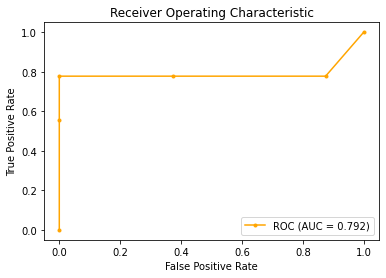

(0.2986111111111111, 0.7916666666666667, 0.7777777777777778)

In [30]:
test.compute()